# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
# !python3 -m pip install wandb

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import wandb
wandb.init(project="DeepRL_bananaFinder", entity="nextflex") 

wandb: Currently logged in as: nextflex. Use `wandb login --relogin` to force relogin


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="/Users/nathan/Documents/Learning/Udacity_deepRL/Value-based-methods/p1_navigation/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0] 
brain = env.brains[brain_name] 

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# 5. Training


Take an action, any action. 
Determine the state, a next action, the reward we got. 
At first the decisions are random 
But each time we understand more about what to do in each scenario 
The reward tells us if an action taken is valuable, and the state ties it together 

We start in a bounded environment.
- Episodic 
- Our state space is 37 dimensions, including velocity
- Our actions are: forward, backward, left, right 
- Our reward is positive or negative 

In [6]:
import agent
agent = agent.Agent(37, 4, 0)

scores = []

num_episodes=1000 
max_timesteps=1000
epsilon_start=1.0
epsilon_end=0.01
epsilon_decay=0.995


BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3                # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network


wandb.init(config={
    "num_episodes": num_episodes,
    "max_timesteps": max_timesteps,
    "epsilon_start": epsilon_start,
    "epsilon_end": epsilon_end,
    "epsilon_decay": epsilon_decay,
    "buffer_size": BUFFER_SIZE, 
    "batch_size": BATCH_SIZE,
    "gamma": GAMMA,
    "tau": TAU,
    "learning_rate": LR,
    "update_every": UPDATE_EVERY 
})

### Training

Episode 100	Average Score: 1.15
Episode 200	Average Score: 4.46
Episode 300	Average Score: 7.93
Episode 400	Average Score: 10.51
Episode 500	Average Score: 13.19
Episode 600	Average Score: 13.51
Episode 700	Average Score: 15.30
Episode 800	Average Score: 15.96
Episode 900	Average Score: 16.61
Episode 1000	Average Score: 16.90


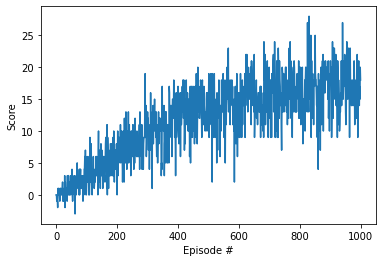

In [7]:
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

scores = []

def dqn(num_episodes, max_timestep, epsilon_start, epsilon_end, epsilon_decay):
    """
    max_timesteps: limits the number of timesteps so we don't get stuck in scenarios with really low rewards or loops
    
    1. Iterate through a set number of episodes
    2. For each episode, reset the environment and the score(reward sum)
    """

    #scores = []
    scores_window = deque(maxlen=100)
    epsilon = epsilon_start
    
    for episode_num in range(1, num_episodes+1):
        # Run through a set number of timesteps, getting rewards and training every so often. Decrease epsilon every episode 
        score = 0
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        #print(state)
        
        for timestep in range(max_timesteps):
            # Choose an action based on an inference 
            action = agent.act(state, epsilon) 

            # Apply action to the environment and get the results 
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]               
            
            # Add the result to memory and train every few preset timesteps 
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break
                
        scores_window.append(score)  # Save the most recent score 
        scores.append(score) 
        epsilon = max(epsilon_end, epsilon_decay*epsilon)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode_num, np.mean(scores_window)), end="")
        if episode_num % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode_num, np.mean(scores_window)))
            wandb.log({"average_score": np.mean(scores_window)}) 
        if np.mean(scores_window)>=15.0:
            # If average scores across the current window of 100 scores is 200 or greater, we are done 
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode_num-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), './checkpoint.pth')
            break
    return scores


scores = dqn(num_episodes, max_timesteps, epsilon_start, epsilon_end, epsilon_decay)


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show() 

In [8]:
torch.save(agent.qnetwork_local.state_dict(), './checkpoint_{}.pth'.format(wandb.run.name)) 

In [9]:
wandb.finish()

average_score,▁▂▄▅▆▆▇███
average_score,16.9


### Training notes

1. Tested at 1000 iterations, nn layer shape: 37-64-4, average score 12 
2. Tested at 1000 iterations,  nn layer shape: 37-128-4, average score 9.5 
3. Found output from forward() was returning from fc2 
4. Tested at 2000 iterations,  nn layer shape: 37-64-4, average score 15.5 
5. Added another hidden layer.  nn layer shape: 37-64-64-4, average score 15.5 
6. Changed buffer size to 1000 from 100000,  removed hidden layer. nn layer shape: 37-64-4, final average score is 15
7. Changed buffer size to 1000 from 10000 final average score is 13 
8. Changed buffer size to 10000, gamma to 0.90 from .99. Average ending score is 11.5
9. Ending average 9.7: 
        num_episodes=2000 
        max_timesteps=1000
        epsilon_start=1.0
        epsilon_end=0.01
        epsilon_decay=0.995
        BUFFER_SIZE = int(1e5)  # replay buffer size
        BATCH_SIZE = 64         # minibatch size
        GAMMA = 0.99            # discount factor
        TAU = 1e-3                # for soft update of target parameters
        LR = 5e-3               # learning rate 
        UPDATE_EVERY = 4        # how often to update the network
10. Changed tau to 1e-1 (actually nope, didn't change) 
11. Changed Tau to 1e-2, buffer size to 1e6
12. Reset to defaults, ending average score is 15.5:
        BUFFER_SIZE = int(1e5)  # replay buffer size
        BATCH_SIZE = 64         # minibatch size
        GAMMA = 0.99            # discount factor
        TAU = 1e-3              # soft update of target parameters
        LR = 5e-4               # learning rate 
        UPDATE_EVERY = 4        # how often to update the network